In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Waqar Ahmed\Desktop\Machine_Learning\ML Project 1\data.csv")

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# ALL Histogram Chart

In [10]:
%matplotlib inline

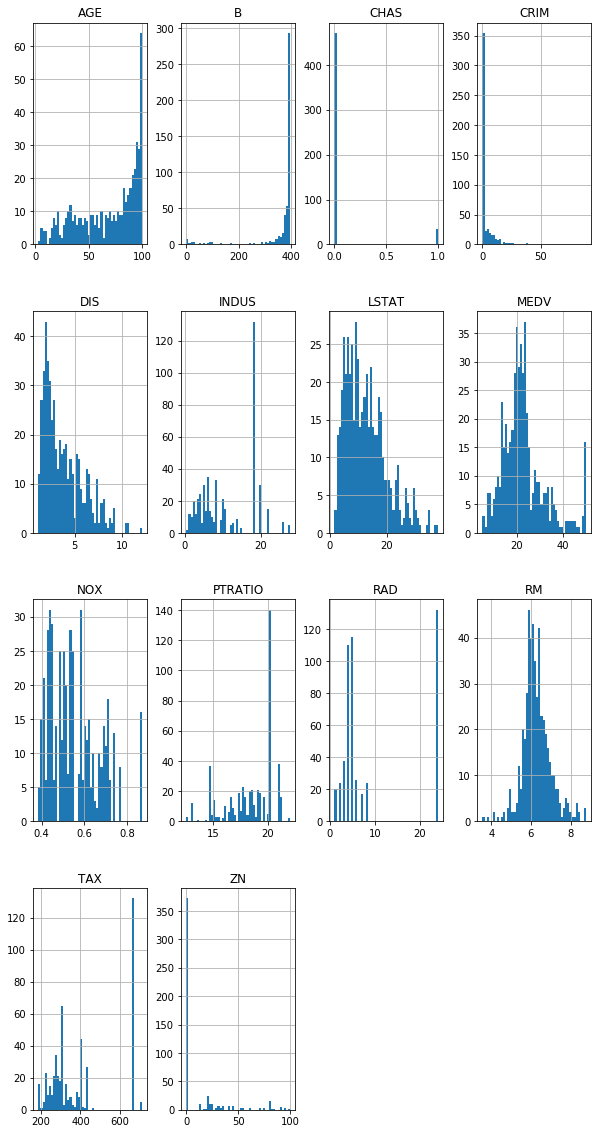

In [12]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(10,20))
plt.show()

# Making your own train_test_split_function

In [28]:
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_size]
#     train_indices=shuffled[test_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]
    

In [33]:
# train_data,test_data = split_train_test(df,0.2)
# print(f'train data length:{len(train_data)}\ntest_data length:{len(test_data)}')

# Using ScikietLearn

In [35]:
from sklearn.model_selection import train_test_split

In [42]:
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

In [50]:
print(f'train data length:{len(train_set)}\ntest_data length:{len(test_set)}\n')

train data length:404
test_data length:102



# For Stratified Data Mean Shuffle Data

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

In [47]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['CHAS']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [52]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [53]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [55]:
housing = strat_train_set.copy()

# Looking For a Correlation

In [59]:
corr_matrix =housing.corr()

In [60]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

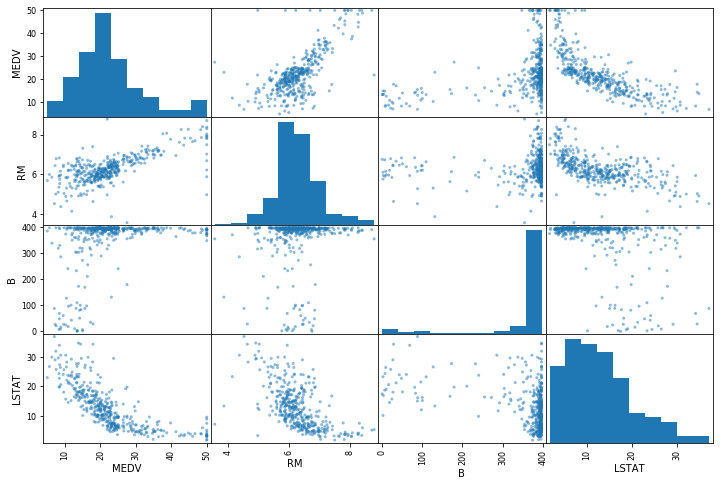

In [62]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','B','LSTAT']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

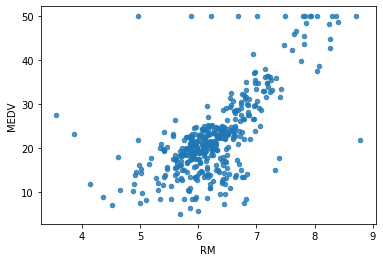

In [65]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)
plt.show()

# Handle with Missing Values

In [66]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [70]:
#1
# a=housing.dropna(subset=["RM"])
# a.shape

In [72]:
#2
# housing.drop('RM',axis=1)

In [74]:
#2
median=housing['RM'].median()

In [75]:
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [76]:
housing.shape

(404, 14)

In [77]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [108]:
housing =housing.drop('RM',axis=1)
housing_label=housing['MEDV']

In [109]:
from sklearn.impute import SimpleImputer

In [110]:
imputer =  SimpleImputer(strategy='median')

In [111]:
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [113]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02, 1.90000e+01,
       3.90955e+02, 1.15700e+01, 2.11500e+01])

In [114]:
X = imputer.transform(housing)

In [115]:
housing_tr= pd.DataFrame(X,columns=housing.columns)

In [116]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


# Creating Pipeline

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [154]:
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),('StdScaler',StandardScaler())])

In [119]:
housing_num_tr = my_pipeine.fit_transform(housing)

In [120]:
housing_num_tr.shape

(404, 13)

# Selecting Model 

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
model = RandomForestRegressor()

In [124]:
model.fit(housing_num_tr,housing_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [125]:
some_data = housing.iloc[:5]

In [127]:
some_label = housing_label.iloc[:5]

In [131]:
prepared_data = my_pipeine.fit_transform(some_data)

In [133]:
Prediction = model.predict(prepared_data)

In [134]:
Prediction

array([22.728, 31.644,  5.803, 26.845, 26.623])

In [136]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Calculating Error

In [140]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(some_label,Prediction)
rmse = np.sqrt(mse)

In [141]:
rmse

6.286781100054288

# Cross_Validation

In [142]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_label,cv=10,scoring='neg_mean_squared_error')

In [144]:
rmse_score = np.sqrt(-scores)

In [145]:
rmse_score

array([0.18043518, 0.28165924, 0.20263622, 0.15066325, 0.12351215,
       0.16708793, 0.16038352, 0.34775023, 0.08226512, 0.41036338])

In [146]:
def print_scores(score):
    print(f'Score: {score}')
    print(f'mean: {score.mean()}')
    print(f'Std: {score.std()}')

In [147]:
print_scores(rmse_score)

Score: [0.18043518 0.28165924 0.20263622 0.15066325 0.12351215 0.16708793
 0.16038352 0.34775023 0.08226512 0.41036338]
mean: 0.21067562151088337
Std: 0.09838690672868253


# Saving the model

In [149]:
from joblib import load,dump
dump(model,'Dragon_Real_State.jolib')

['Dragon_Real_State.jolib']

# Testing the model

In [156]:
X_train = strat_test_set.drop('MEDV',axis=1)
Y_train = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.fit_transform(X_train)

In [158]:
test_predictions = model.predict(X_test_prepared)

In [159]:
test_mse = mean_squared_error(test_predictions,Y_train)

In [160]:
test_rmse = np.sqrt(test_mse)

In [161]:
test_rmse

16.300070303288784

# Using the model

In [162]:
from joblib import load,dump
model = load('Dragon_Real_State.jolib')

In [166]:
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([5.983])